# Make plotly graphs
It can be unwieldy to do data munging and graph development in the app itself. Much of this can be done in a Jupyter notebook then transferred into the app 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [2]:
df0 = pd.read_csv('../data/IHME_GBD_2017_HEALTH_SDG_1990_2030_SCALED_Y2018M11D08.csv')
loc_meta = pd.read_csv('../data/location_metadata.csv')

In [3]:
df0.head()

,Unnamed: 0,location_id,location_name,year_id,estimate_type,indicator_id,indicator_short,ihme_indicator_description,indicator_outline,indicator_unit,target_description,goal_description,scaled_value,scaled_lower,scaled_upper
0,27,6,China,2017,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,74.5,67.6,82.8
1,68,7,North Korea,2017,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,76.9,41.1,100.0
2,109,8,Taiwan,2017,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,84.5,77.7,90.7
3,150,10,Cambodia,2017,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,63.3,49.3,81.1
4,191,11,Indonesia,2017,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,59.8,55.3,63.4


In [4]:
# Make sure our data is unique by location and indicator
assert df0.duplicated(['location_name', 'indicator_id']).sum() == 0

# Indicator Value by country in wide format
df = df0.pivot(index='location_name', columns='indicator_short', values='scaled_value')
df = pd.merge(loc_meta, df.reset_index())
df.head()

,location_id,ihme_loc_id,location_name,super_region_name,region_name,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,...,Sexual Violence,Skilled Birth Attend,Smoking Prev,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water
0,33,ARM,Armenia,"Central Europe, Eastern Europe, and Central Asia",Central Asia,52.4,41.1,63.0,97.4,20.3,...,99.0,99.5,38.1,55.8,63.2,71.8,68.9,95.8,76.4,96.6
1,34,AZE,Azerbaijan,"Central Europe, Eastern Europe, and Central Asia",Central Asia,36.6,34.9,52.6,86.3,18.8,...,93.3,96.3,42.8,86.3,41.8,60.8,37.9,72.3,58.2,88.3
2,35,GEO,Georgia,"Central Europe, Eastern Europe, and Central Asia",Central Asia,35.2,37.9,43.9,66.3,18.0,...,100.0,99.0,35.9,60.0,49.4,64.7,65.4,84.6,75.6,88.9
3,36,KAZ,Kazakhstan,"Central Europe, Eastern Europe, and Central Asia",Central Asia,47.0,51.3,29.6,88.3,38.6,...,98.7,99.6,39.6,12.0,48.0,67.6,59.6,66.9,72.8,88.6
4,37,KGZ,Kyrgyzstan,"Central Europe, Eastern Europe, and Central Asia",Central Asia,40.6,39.7,51.6,97.6,65.9,...,90.7,99.6,52.1,47.6,40.0,60.7,51.2,72.7,60.5,81.9


# Develop plots
- Show seaborn version
- Make plotly version 

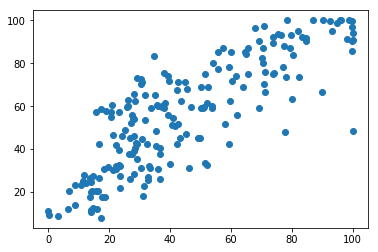

In [5]:
plt.scatter(df['Adol Birth Rate'], df['Under-5 Mort'])

In [6]:
# Import plotly and set to work offline (ie, render plots here rather than plotly)
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

### Note - Plotly offline doesn't render in github

In [7]:
x_varname = 'Adol Birth Rate'
y_varname = 'Under-5 Mort'

data = [
            go.Scatter(
                x=df[df['super_region_name'] == i][x_varname],
                y=df[df['super_region_name'] == i][y_varname],
                text=df[df['super_region_name'] == i]['location_name'],
                mode='markers',
                opacity=0.7,
                marker={
                    'size': 12,
                    'line': {'width': 0.5, 'color': 'white'}
                },
                name=i
            ) for i in df.super_region_name.unique()
        ]

layout = go.Layout(
    title='Testing testing'
)

iplot(data, layout)